In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Point:
    visited = False
    group = "BRAK"
    iloscSasiadow = 0
    
    def __init__(self,coord):
        if (len(coord) == 0):
            self.x = np.random.random()
            self.y = np.random.random()
            self.coord = []
            self.coord.append(self.x)
            self.coord.append(self.y)
        else:
            self.x = coord[0]
            self.y = coord[1]
            self.coord = coord

In [3]:
def dist(p1 , p2):
    return ((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** (1/2)

In [4]:
def dbscan_pklasa(points, minPts = 10, eps = 0.1):
    groupNo = 0
    for point in points:
        if point.visited == True :
            continue
        point.visited = True
        neighbourPts = getNeighbour(point, points , eps)
        if len(neighbourPts) <= minPts :
            point.group = "NOISE" 
        else:
            groupNo+=1
            expandCluster(point, neighbourPts, groupNo, eps, minPts, points)		
    return groupNo

In [5]:
def getNeighbour(point,points,eps):
    neighbour = []
    for potNeig in points:
        if (dist(potNeig , point) < eps) and (point != potNeig):
            neighbour.append(potNeig)
    point.iloscSasiadow = len(neighbour)
    return neighbour

In [6]:
def expandCluster(point, neighbour, groupNo, eps, minPts, points):
    point.group = "CLUSTER" + str(groupNo)
    cluster = []
    cluster.extend(neighbour)

    while( len(cluster) > 0 ):
        newPoint = cluster[0]
        if (newPoint.visited == False):
            newPoint.visited = True
            newPointNeigh = getNeighbour(newPoint, points, eps)
            if ( len(newPointNeigh) >= minPts):
                cluster.extend(newPointNeigh)
        if (newPoint.group == "BRAK" or newPoint.group == "NOISE"):
            newPoint.group = "CLUSTER" + str(groupNo)
        del cluster[0]


In [8]:
punkty = []
for x in range(300):
    punkty.append(Point([]))

iloscClustrow = dbscan_pklasa(punkty)
print(iloscClustrow)

6


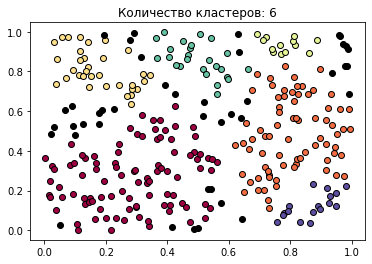

In [13]:
colors = plt.cm.Spectral(np.linspace(0, 1, iloscClustrow))
group = 1

for col in colors:
    for pkt in punkty:
        if (pkt.group == "CLUSTER"+str(group)):
            size = 8
            if(pkt.iloscSasiadow > 10):
                size = 16
            plt.plot(pkt.x,pkt.y, 'o', markerfacecolor=col, markeredgecolor='k')
    group+=1

x = []
y = []
for pkt in punkty:
    if (pkt.group == "NOISE"):
        x.append(pkt.x)
        y.append(pkt.y)
plt.plot(x,y, 'o', markerfacecolor="black", markeredgecolor='k')
plt.title('Количество кластеров: %d' % iloscClustrow)
plt.show()